#### RFR,CNN,HGBR trained on total 2019 data with timestamps

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import h5py
from datetime import datetime

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
def visualise(y_pred,y_test):

    f = plt.figure()
    f.set_figheight(5)
    f.set_figwidth(18)

    # Line plot
    plt.plot(y_test, label='True Values')
    plt.plot(y_pred, label='Predictions')
    plt.xlabel('Samples')
    plt.ylabel('PV value(KW)')
    plt.legend()
    plt.title('Line Plot')
    plt.show()

    # Distribution plot
    sns.distplot(y_test, hist=False, label='True Values')
    sns.distplot(y_pred, hist=False, label='Predictions')
    plt.xlabel('PV value (KW)')
    plt.ylabel('Density')
    plt.title("Distribution Plot")
    plt.legend()
    plt.show()    

    # # Box plot
    # data = [y_test, y_pred]
    # labels = ['True Values', 'Predictions']
    # plt.boxplot(data, labels=labels)
    # plt.ylabel('PV value(KW)')
    # plt.title("Box Plot")
    # plt.show()

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
def performance_metrics(y_pred,y_test):
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    return [rmse,mae,r2]

In [5]:
def saveModel(model,file_name):
    joblib.dump(model,'./trainedModels/'+file_name)
    # pickle.dump(model,open('./trainedModels/'+file_name,'wb'))

In [6]:
def loadModel(filename):
    model = joblib.load("./bestModels/"+filename)
    # model = pickle.load(open('./trainedModels/'+filename,'rb'))
    return model

In [7]:
with h5py.File("./Total_2019_Data/2019_data.hdf5",'r') as f:
    X_train_Images = np.array(f['trainval/images_log'])
    Y_train=np.array(f['trainval/pv_log'])
    X_test_Images = np.array(f['test/images_log'])
    Y_test=np.array(f['test/pv_log'])


# X_train_Images = X_train_Images[:100000]
# X_test_Images = X_test_Images[:100000]
X_train_Images.shape

(119940, 64, 64, 3)

In [8]:
X_train_timestamps = np.load('./Total_2019_Data/2019_train.npy',allow_pickle=True)
X_test_timestamps = np.load('./Total_2019_Data/2019_test.npy',allow_pickle=True)

X_train_timestamps = np.array([(dt.timestamp()) for dt in X_train_timestamps])
X_test_timestamps = np.array([(dt.timestamp()) for dt in X_test_timestamps])

X_train_timestamps.shape

(119940,)

In [9]:
X_train_Combined = np.concatenate((X_train_timestamps.reshape(-1, 1), X_train_Images.reshape(X_train_Images.shape[0], -1)), axis=1)
X_test_Combined = np.concatenate((X_test_timestamps.reshape(-1, 1), X_test_Images.reshape(X_test_Images.shape[0], -1)), axis=1)

X_train_Combined.shape

(119940, 12289)

In [10]:
X_train_Combined_flat = X_train_Combined.reshape(X_train_Combined.shape[0], -1)
X_test_Combined_flat = X_test_Combined.reshape(X_test_Combined.shape[0], -1)
print("XTrain Combined Flat shape: ",X_train_Combined_flat.shape)
print("YTrain shape: ",Y_train.shape)
print("XTest Combined Flat shape: ",X_test_Combined_flat.shape)
print("XTest shape: ",Y_test.shape)

XTrain Combined Flat shape:  (119940, 12289)
YTrain shape:  (119940,)
XTest Combined Flat shape:  (5877, 12289)
XTest shape:  (5877,)


## Hist Gradient Boosting Regressor

In [11]:
# from sklearn.ensemble import HistGradientBoostingRegressor
# np.random.seed(42)
# HGBR = HistGradientBoostingRegressor( learning_rate=0.1,
#     max_iter=100,
#     max_depth=50,
#     l2_regularization=0.1,
#     n_iter_no_change=5,
#     scoring='loss',
#     random_state=42)
# # HGBR = HistGradientBoostingRegressor()
# # X_train_Combined_flat = X_train_Combined_flat.astype('float32')
# # Y_train = Y_train.astype('float32')

# HGBR.fit(X_train_Combined_flat,Y_train)

In [12]:
# modelSaveName = "Total_2019_Data_HGBR_"+str(datetime.now().timestamp())+".pkl"
# saveModel(HGBR,modelSaveName)

Root Mean squared error for Hist Gradient Boosting Regressor: 1.8298794617902963
Mean Absolute error for Hist Gradient Boosting Regressor: 1.0844593490280148
R2 value for Hist Gradient Boosting Regressor: 0.938811258267803



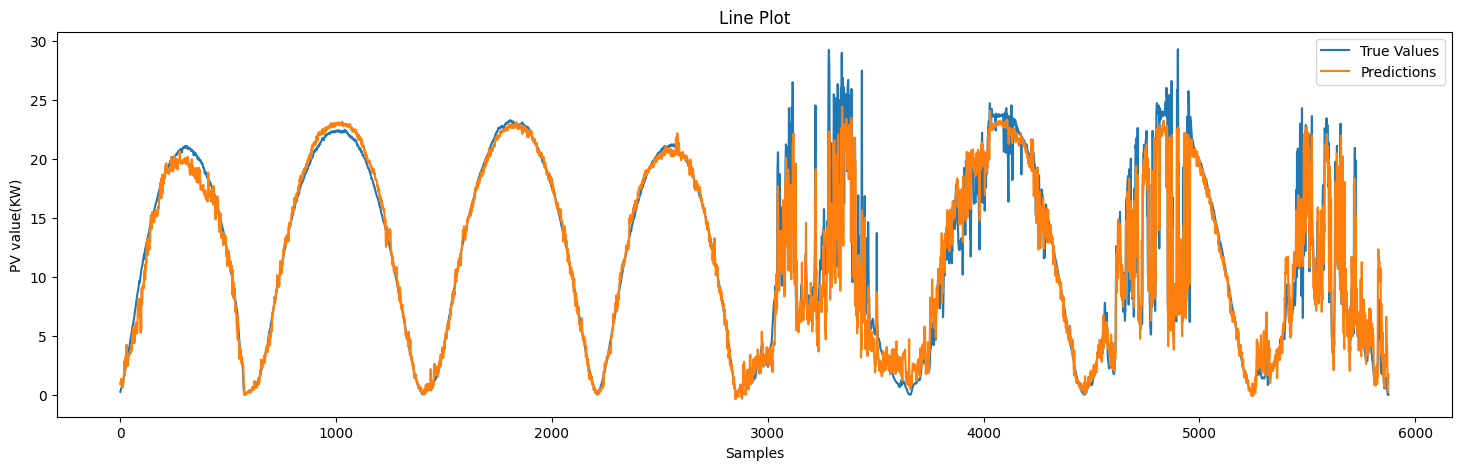

d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

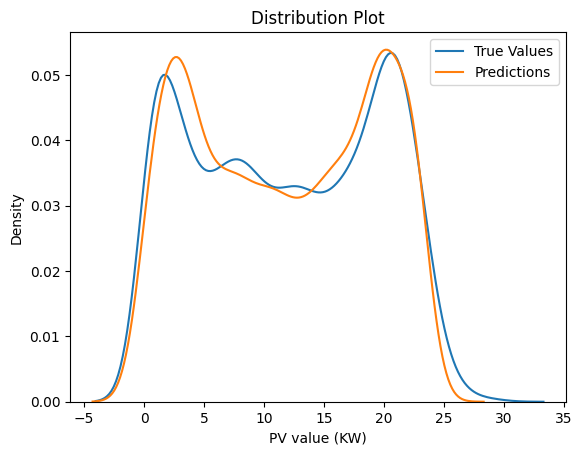

In [13]:
#  Predict PV values for test data
loaded_HGBR = loadModel("Total_2019_Data_HGBR_1694489864.451076.pkl")
# loaded_HGBR = loadModel("../trainedModels/Total_2019_Data_HGBR_1693897641.883796.pkl")
HGBR_y_pred = loaded_HGBR.predict(X_test_Combined_flat)
# HGBR_y_pred = HGBR.predict(X_test_Combined_flat)

[HGBR_rmse,HGBR_mae,HGBR_r2] = performance_metrics(Y_test,HGBR_y_pred)

# Evaluate model accuracy on test data
print('Root Mean squared error for Hist Gradient Boosting Regressor:', HGBR_rmse)
print('Mean Absolute error for Hist Gradient Boosting Regressor:', HGBR_mae)
print('R2 value for Hist Gradient Boosting Regressor:', HGBR_r2)
print()

visualise(HGBR_y_pred,Y_test)

## Random Forest Regressor

In [14]:
# from sklearn.ensemble import RandomForestRegressor

# np.random.seed(42)
# RFR = RandomForestRegressor(random_state=42,n_estimators=100,max_depth=50)
# RFR.fit(X_train_Combined_flat,Y_train)

In [15]:
# modelSaveName = "Total_2019_Data_RFR_"+str(datetime.now().timestamp())+".pkl"
# saveModel(RFR,modelSaveName)

Root Mean squared error for Random Forest Regressor: 2.051051603789671
Mean Absolute error for Random Forest Regressor: 1.1927309525641285
R2 value for Random Forest Regressor: 0.9199314419817372



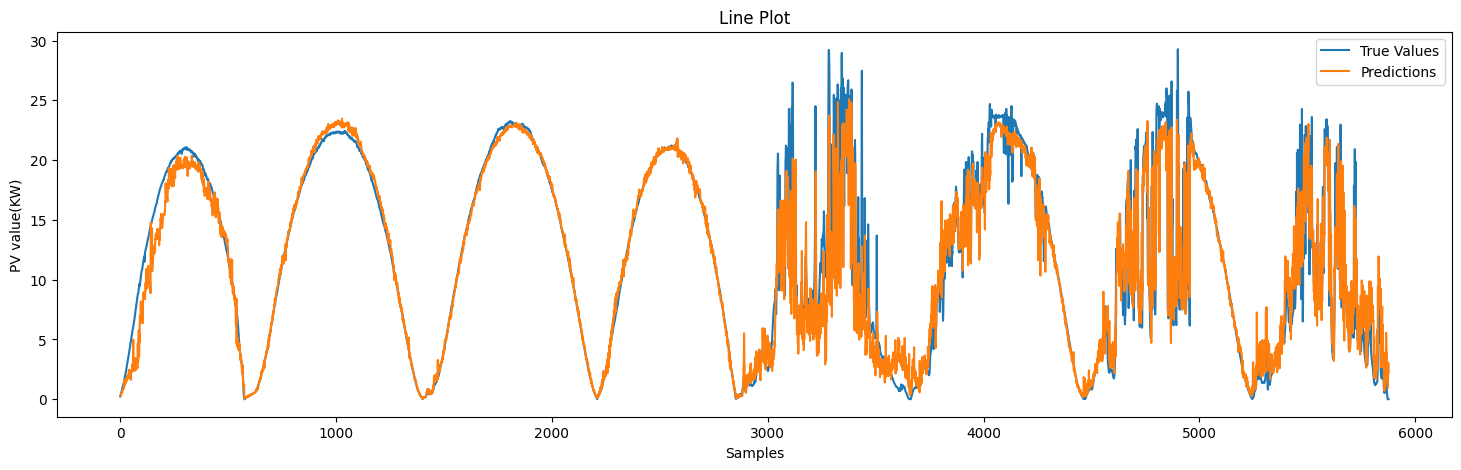

d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

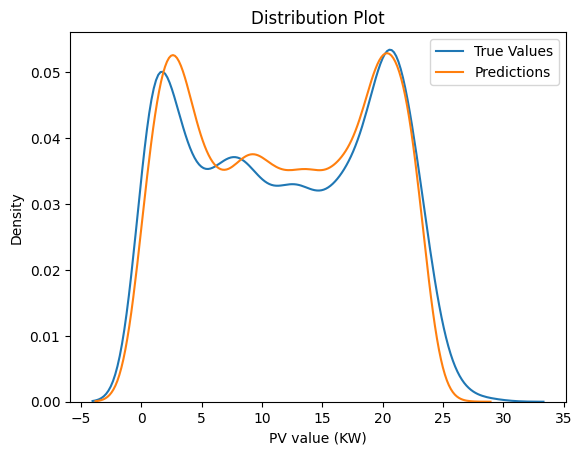

In [16]:
#  Predict PV values for test data
loaded_RFR = loadModel("Total_2019_Data_RFR_1694585845.479101.pkl")
RFR_y_pred = loaded_RFR.predict(X_test_Combined_flat)
# RFR_y_pred = RFR.predict(X_test_Combined_flat)

[RFR_rmse,RFR_mae,RFR_r2] = performance_metrics(Y_test,RFR_y_pred)

# Evaluate model accuracy on test data
print('Root Mean squared error for Random Forest Regressor:', RFR_rmse)
print('Mean Absolute error for Random Forest Regressor:', RFR_mae)
print('R2 value for Random Forest Regressor:', RFR_r2)
print()

visualise(RFR_y_pred,Y_test)

## Convolutional Neural Network

In [17]:
# # X_trainval_reshaped = X_train_Combined.reshape(-1, 64, 64, 3) / 255.0
# # X_test_reshaped = X_test_Combined.reshape(-1, 64, 64, 3) / 255.0

# # Define the model architecture
# CNN = Sequential()
# CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train_Images.shape[1:]))
# CNN.add(MaxPooling2D((2, 2)))
# CNN.add(Conv2D(64, (3, 3), activation='relu'))
# CNN.add(MaxPooling2D((2, 2)))
# CNN.add(Conv2D(128, (3, 3), activation='relu'))
# CNN.add(MaxPooling2D((2, 2)))
# CNN.add(Flatten())
# CNN.add(Dense(64, activation='relu'))
# CNN.add(Dense(1, activation=None))

# # Compile the model
# CNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# # Train the model
# CNN.fit(X_train_Images, Y_train, epochs=100, batch_size=256)

In [18]:
# modelSaveName = "Total_2019_Data_CNN_"+str(datetime.now().timestamp())+".pkl"
# saveModel(CNN,modelSaveName)
# CNN.save("CNN_100_256")

184/184 [==============================] - 7s 37ms/step
Root Mean squared error for CNN: 1.667466695628354
Mean Absolute error for CNN: 0.9011883251724552
R2 value for CNN: 0.9519675296527175



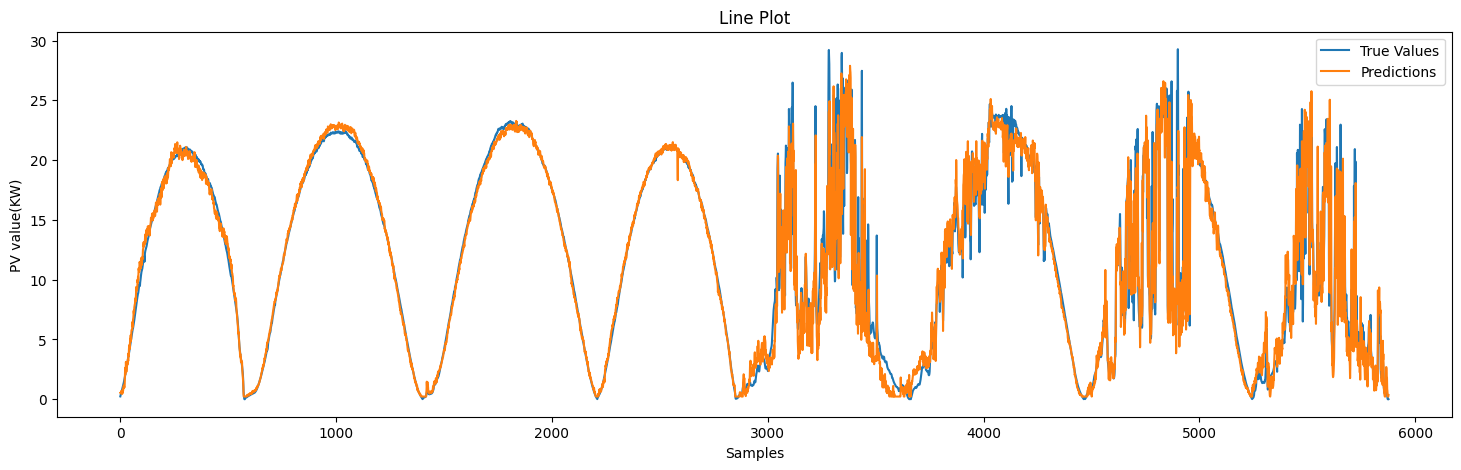

d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\BTech\BTP\BTP1\Final_BTP1_Nowcast\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

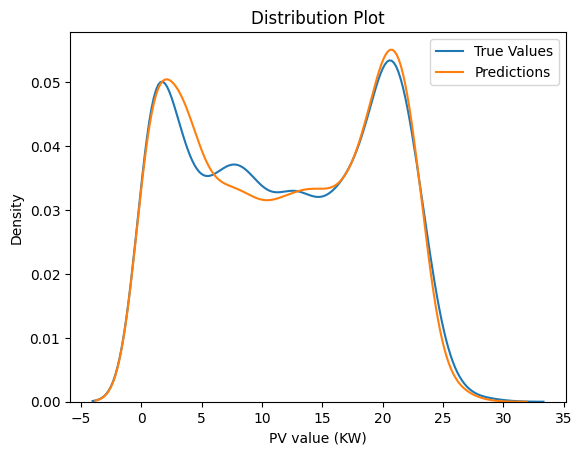

In [19]:
#  Predict PV values for test data
# loaded_CNN = loadModel("Total_2019_Data_CNN_1694003964.593551.pkl")
loaded_CNN = tf.keras.models.load_model("./bestModels/CNN_100_256")
# loaded_CNN = tf.keras.models.load_model("./bestModels/Total_2019_Data_CNN_1694596594.91721")
CNN_y_pred = loaded_CNN.predict(X_test_Images)

# CNN_y_pred = CNN.predict([X_test_Images,X_test_timestamps])
# CNN_y_pred = CNN.predict(X_test_Images)

[CNN_rmse,CNN_mae,CNN_r2] = performance_metrics(Y_test,CNN_y_pred)

# Evaluate model accuracy on test data
print('Root Mean squared error for CNN:', CNN_rmse)
print('Mean Absolute error for CNN:', CNN_mae)
print('R2 value for CNN:', CNN_r2)

print()


visualise(np.squeeze(CNN_y_pred),Y_test)

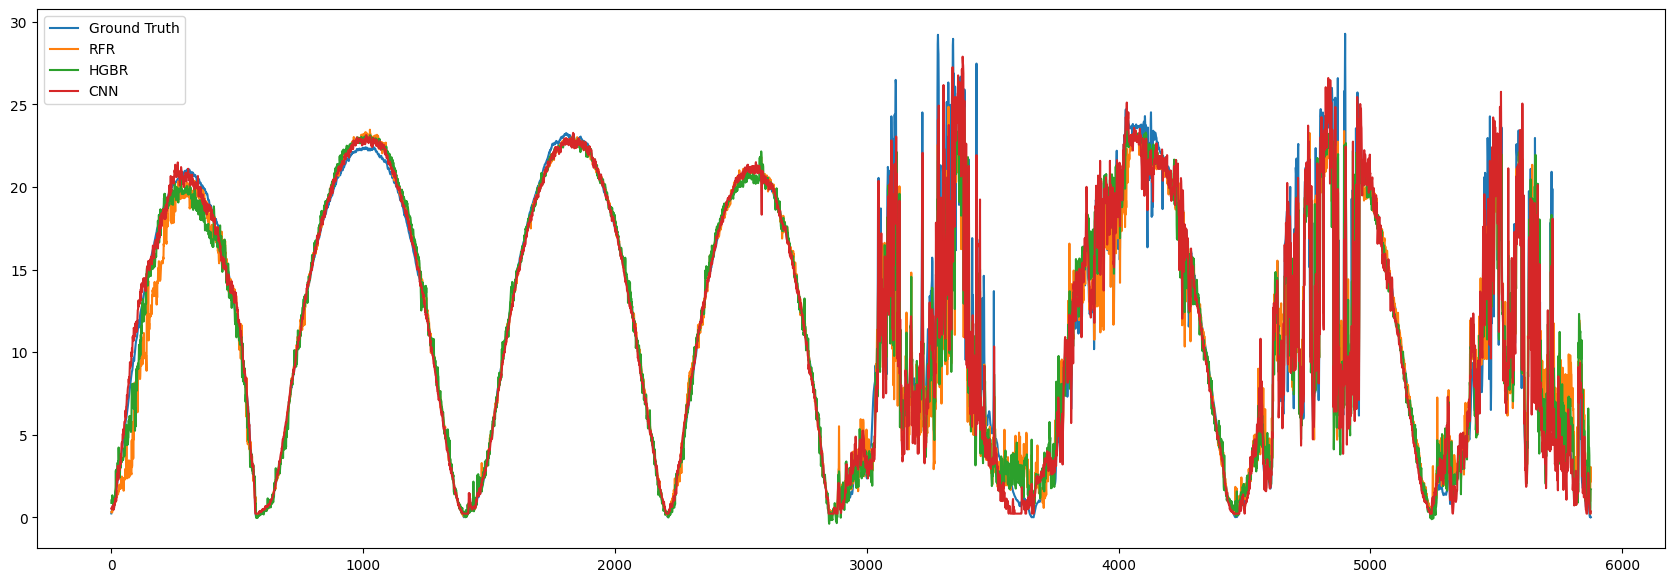

In [20]:
f = plt.figure()
f.set_figheight(7)
f.set_figwidth(21)


plt.plot(Y_test,label="Ground Truth")
plt.plot(RFR_y_pred,label="RFR")
plt.plot(HGBR_y_pred,label="HGBR")
plt.plot(CNN_y_pred,label="CNN")
plt.legend()
plt.show()

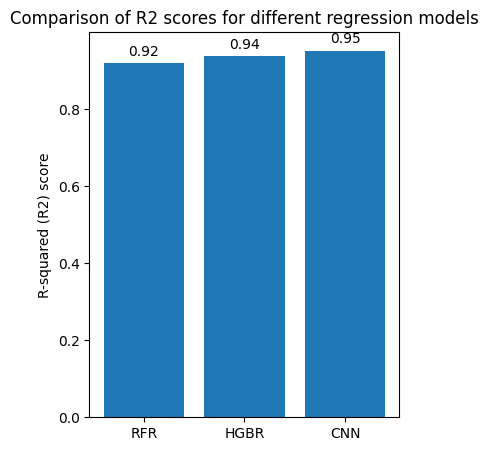

In [21]:
# create a bar plot to compare the R2 scores of the models
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(4)
# models = ['Random Forest Regressor','Gradient Boosting Regressor','Multi-Layer Perceptron','Convolutional Neural Network']
models = ['RFR','HGBR','CNN']
scores = [RFR_r2,HGBR_r2,CNN_r2]
rects = ax.bar(models, scores)
ax.set_ylabel('R-squared (R2) score')
ax.set_title('Comparison of R2 scores for different regression models')
# add value labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()


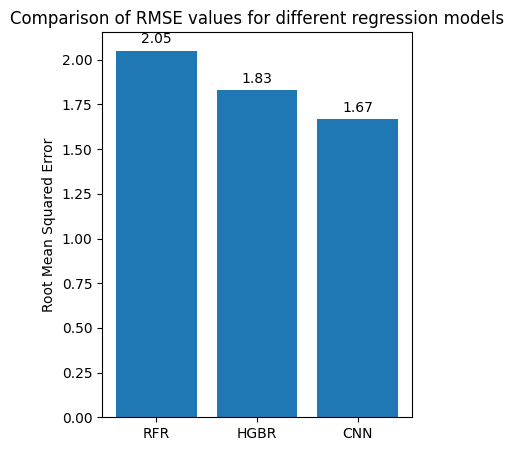

In [22]:
# create a bar plot to compare the R2 scores of the models
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(4)
# models = ['Random Forest Regressor','Gradient Boosting Regressor','Multi-Layer Perceptron','Convolutional Neural Network']
models = ['RFR','HGBR','CNN']
scores = [RFR_rmse,HGBR_rmse, CNN_rmse]
rects = ax.bar(models, scores)
ax.set_ylabel('Root Mean Squared Error')
ax.set_title('Comparison of RMSE values for different regression models')
# add value labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

In [23]:
# comb = []
# for i,j in zip(HGBR_y_pred,CNN_y_pred):
#     comb.append((i+j)/2)

# [RNN_rmse,RNN_mae,RNN_r2] = performance_metrics(Y_test,comb)

# # Evaluate model accuracy on test data
# print('Root Mean squared error for RNN:', RNN_rmse)
# print('Mean Absolute error for RNN:', RNN_mae)
# print('R2 value for RNN:', RNN_r2)
# print()
# visualise(np.squeeze(comb),Y_test)

In [24]:
def DaywisePlot(Y_pred,Y_test):
    start_indices=[0,2852,575,3656,1400,4464,2211,5245]
    end_indices=[574,3655,1339,4463,2210,5244,2851,5876]
    fig, axs = plt.subplots(4, 2, figsize=(13, 13))
    axs = axs.flatten()

    # Create 8 line plots
    for i in range(len(start_indices)):
        axs[i].plot(Y_test[start_indices[i]:end_indices[i]+1],label='True Values')
        axs[i].plot(Y_pred[start_indices[i]:end_indices[i]+1],label='Predictions')
        axs[i].set_xlabel('Samples')
        axs[i].set_ylabel('PV value(KW)')
        axs[i].legend()
        [rmse,mae,r2] = performance_metrics(Y_pred[start_indices[i]:end_indices[i]+1],Y_test[start_indices[i]:end_indices[i]+1])
        axs[i].text(0.02,0.45,"RMSE: {0:.2f}\nMAE: {1:.2f}".format(rmse,mae),transform=axs[i].transAxes)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()


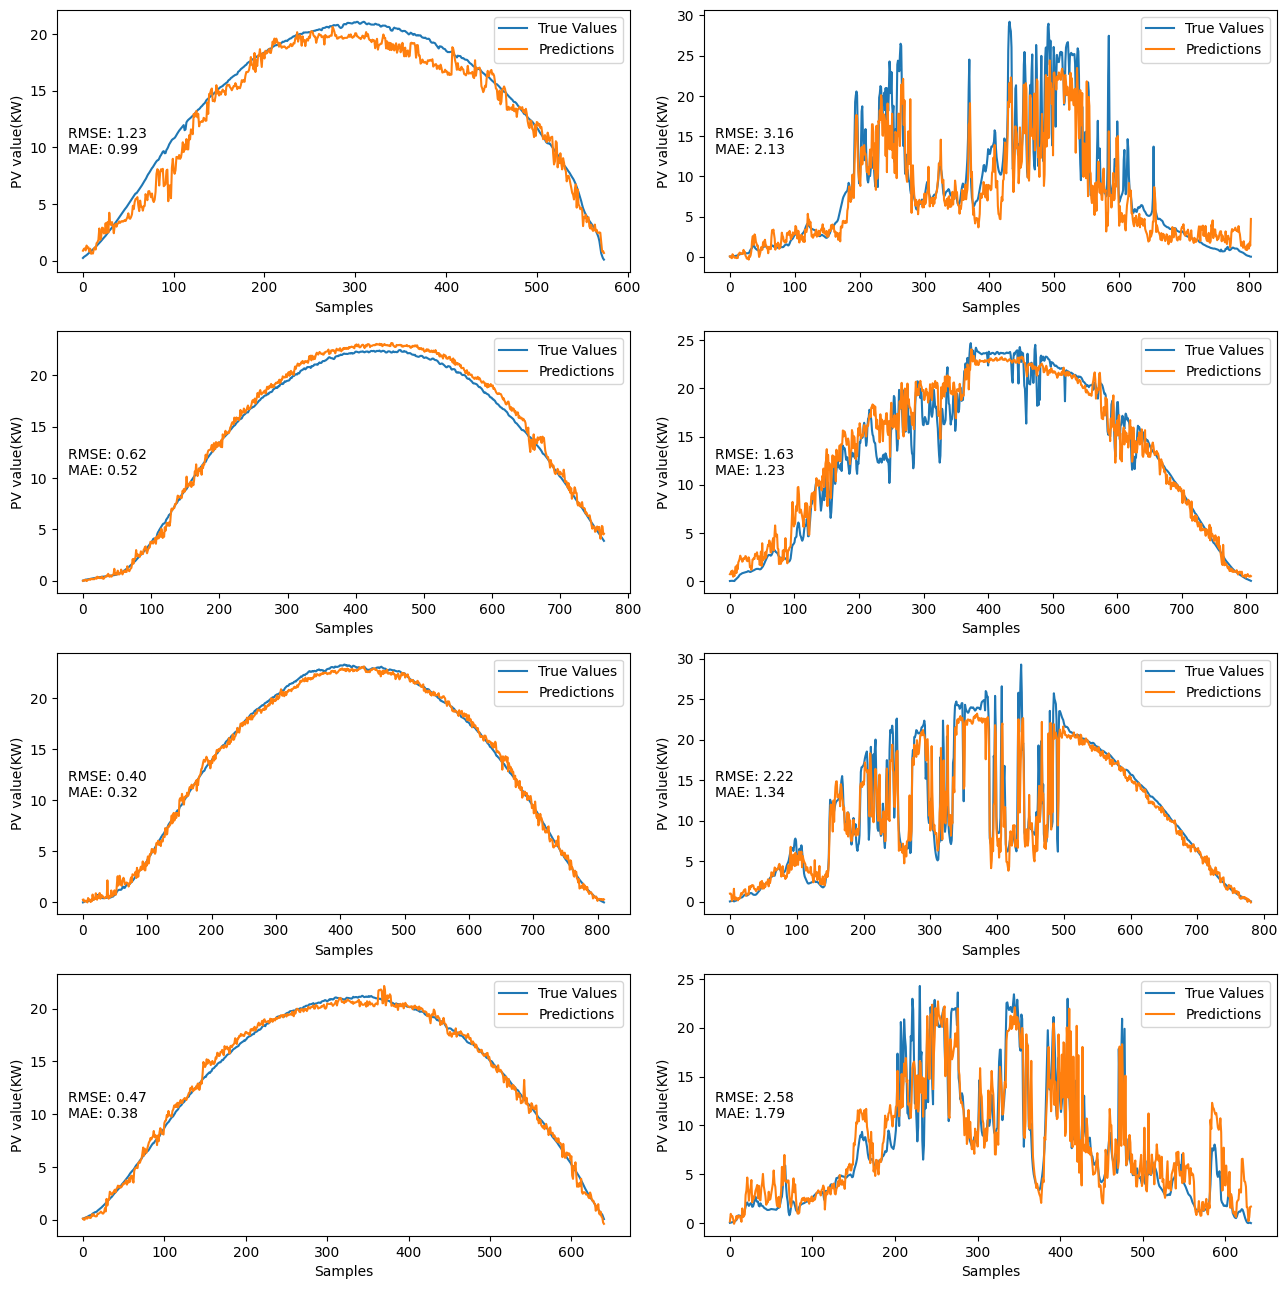

In [25]:
DaywisePlot(HGBR_y_pred,Y_test)

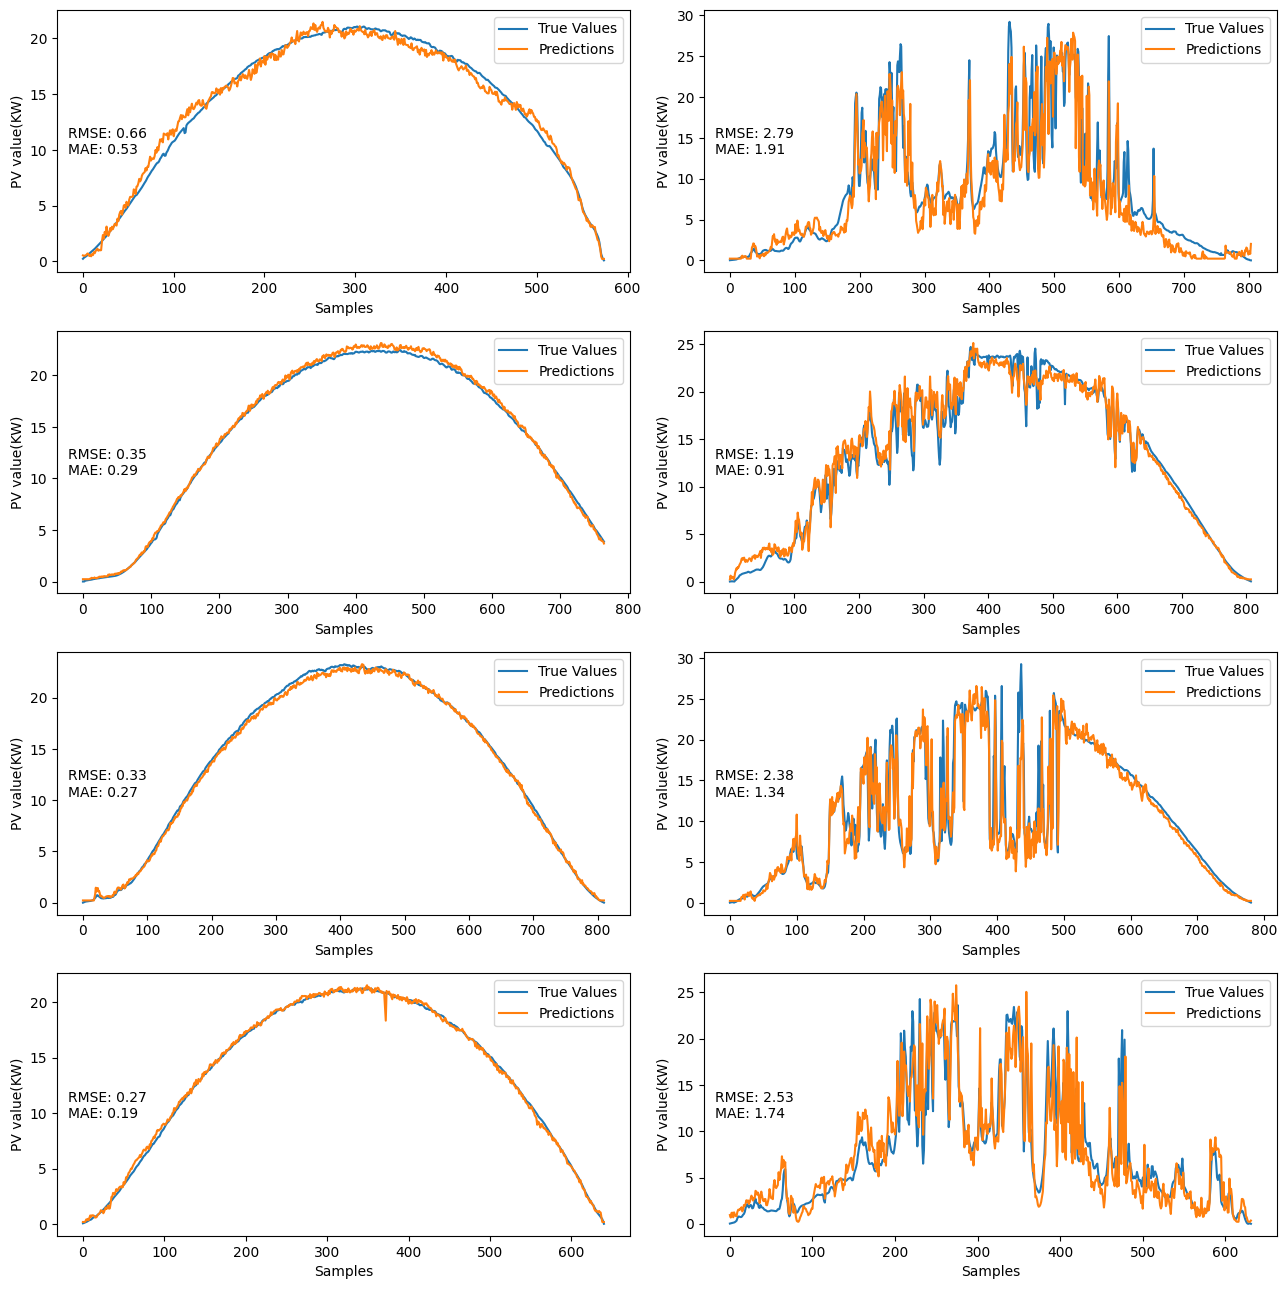

In [26]:
DaywisePlot(CNN_y_pred,Y_test)

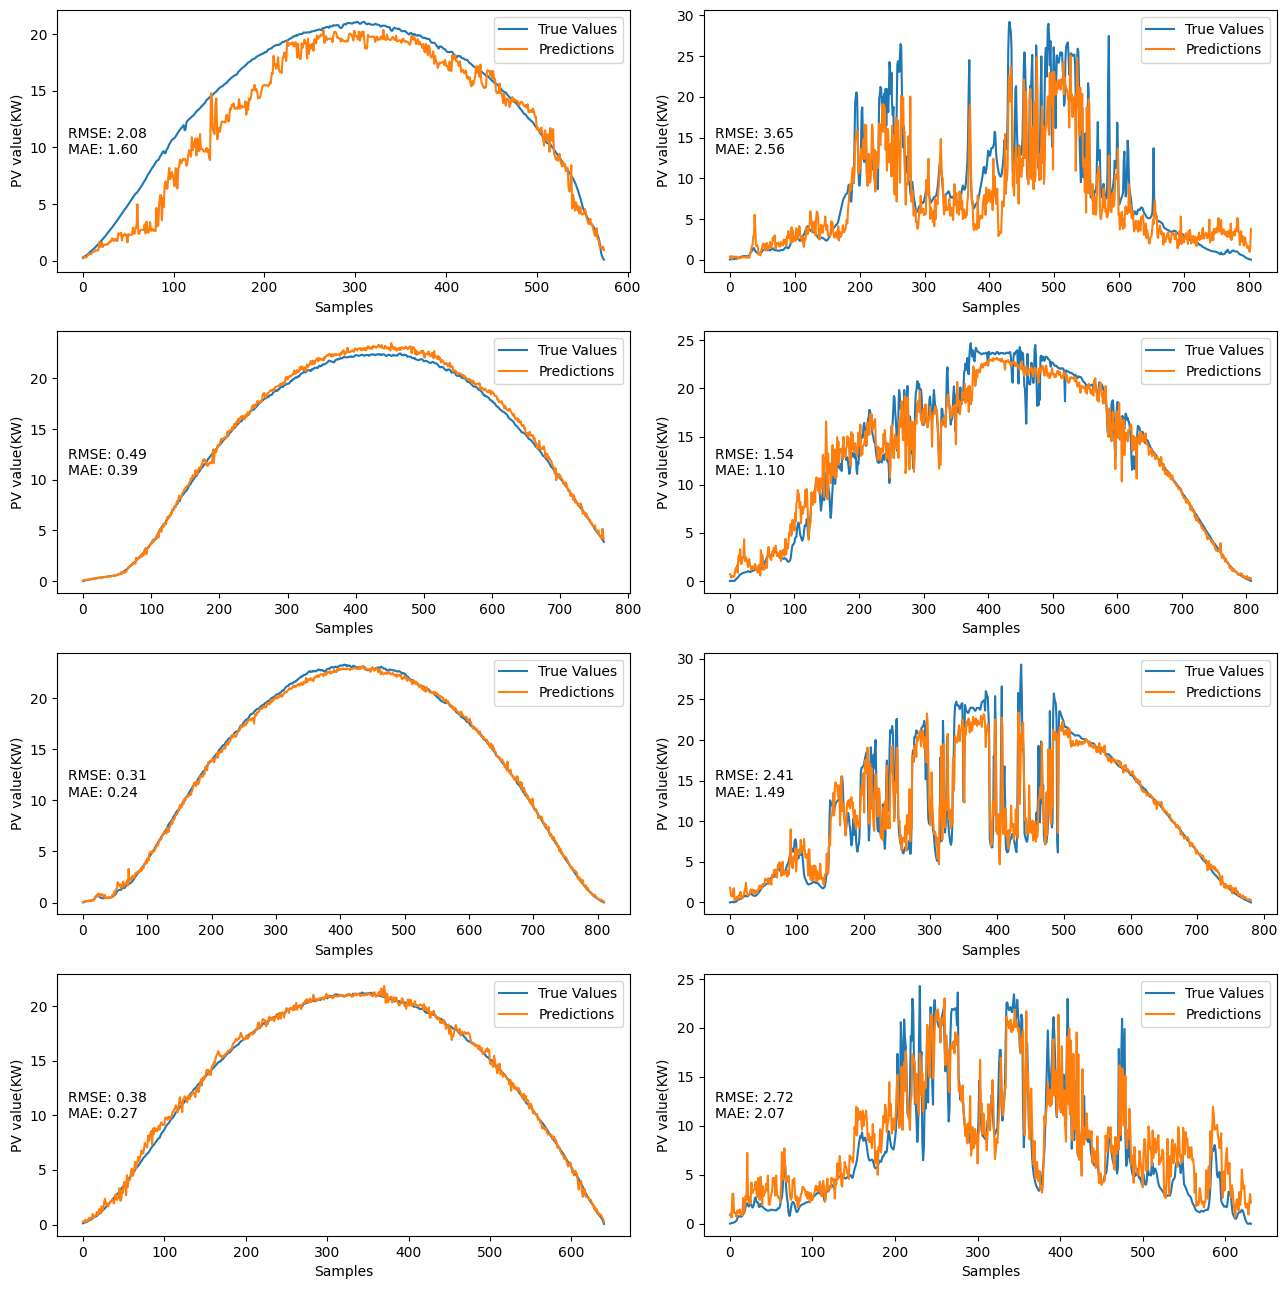

In [27]:
DaywisePlot(RFR_y_pred,Y_test)

In [28]:
# DaywisePlot(comb,Y_test)